In [1]:
import pandas as pd
import numpy as np

Vamos a trabajar con el dataset del titanic: https://www.kaggle.com/c/titanic/overview

In [2]:
titanic = pd.read_csv('titanic/train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Información básica de las columnas:

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Seleccionamos dos columnas para estudiar las odds ratio y las proporciones

In [5]:
dt = titanic[['Survived','Sex']]
dt.head()

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


Vamos a ver el porcentaje de mujeres y hombres:

In [7]:
dt['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
100*dt['Sex'].value_counts()/len(dt['Sex'])

male      64.758698
female    35.241302
Name: Sex, dtype: float64

Podemos hacer un bar plot:

In [9]:
import seaborn as sns

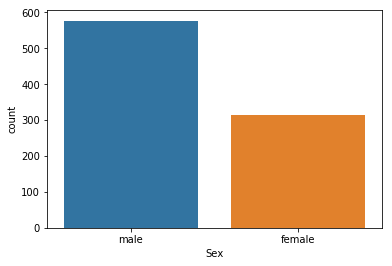

In [10]:
sns.countplot(dt['Sex'])

Podemos sacar una tabla como la de antes:

In [11]:
pd.crosstab(index=dt['Survived'],columns=dt['Sex'], margins=True) # margins para sacar los totales

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


Podemos hacer la tabla con las proporciones/probabilidades de cada clase:

In [12]:
pd.crosstab(index=dt['Survived'],columns=dt['Sex'], margins=True).apply(lambda r: r*100/len(dt))

Sex,female,male,All
Survived,,,
0,9.090909,52.525253,61.616162
1,26.150393,12.233446,38.383838
All,35.241302,64.758698,100.000000


Igual pero relativo por cada fila:

In [14]:
pd.crosstab(index=dt['Survived'],columns=dt['Sex']).apply(lambda r: r*100/r.sum(), axis=1)

Sex,female,male
Survived,,
0,14.754098,85.245902
1,68.128655,31.871345


In [15]:
# De los que sobreviven cuántos son hombres
109/342

0.31871345029239767

Relativo por columnas:

In [16]:
pd.crosstab(index=dt['Survived'],columns=dt['Sex']).apply(lambda r: r*100/r.sum(), axis=0)

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [17]:
# De los hombres, cuántos sobreviven
109/577

0.18890814558058924

Podemos hacer otro barplot:

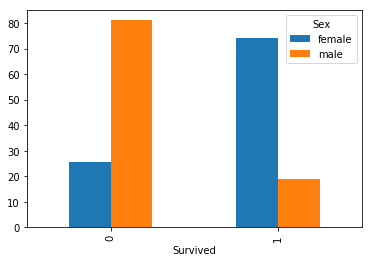

In [18]:
pd.crosstab(index=dt['Survived'],columns=dt['Sex']).apply(lambda r: r*100/r.sum(), axis=0).plot(kind='bar')

Vamos a calcular odds y proporciones:

In [22]:
p_mujer_vive=233/314
p_mujer_vive

0.7420382165605095

In [23]:
p_mujer_muere=1-p_mujer_vive

In [24]:
p_hombre_vive=109/577
p_hombre_muere=1-p_hombre_vive

In [25]:
# Odds mujer
odds_mujer=p_mujer_vive/p_mujer_muere
odds_mujer

2.876543209876542

In [26]:
# Odds hombre
odds_hombre=p_hombre_vive/p_hombre_muere
odds_hombre

0.23290598290598288

In [55]:
# Odds ratio
odds_ratio=odds_hombre/odds_mujer
odds_ratio

0.08096731594585674

In [28]:
odds_mujer/odds_hombre

12.350662589194696

Hay funciones que calculan los odds ratio (pero no entraremos demasiado)

In [29]:
import scipy.stats as stats
table=pd.crosstab(index=dt['Survived'],columns=dt['Sex'])
oddsratio, pvalue =stats.fisher_exact(table)

oddsratio

0.08096731594585672

### El modelo:

In [30]:
dt.head()

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


Para transformar la variable Sex en unos y ceros usamos `get_dummies`:

In [32]:
dt=pd.get_dummies(dt)
dt.head()

,Survived,Sex_female,Sex_male
0,0,0,1
1,1,1,0
2,1,1,0
3,1,1,0
4,0,0,1


Como es redundante tiramos una:

In [33]:
dt=dt.drop('Sex_female',axis=1)
dt.head()

,Survived,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


Hagamos la regresión logística:

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='warn', max_iter=100, multi_class='warn', verbose=0, warm_start=False, n_jobs=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It c

In [36]:
# Definimos el modelo
logreg=LogisticRegression(random_state=0, solver='lbfgs') #Se puede fijar un solver

In [37]:
# parámetros del modelo
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [46]:
# Definimos X e y
X = dt.drop('Survived',axis=1) # Para que me de un dataframe y no una serie
y=dt['Survived']

In [47]:
# Ajustamos
logreg = logreg.fit(X,y)

Coeficientes del modelo: $\beta$ = `coef_`, $\alpha$ = `intercept_`.

$$p=\frac{1}{1+e^{-(\alpha+\beta x)}}$$

In [48]:
print('alpha: ', logreg.intercept_)
print('beta: ', logreg.coef_)

alpha:  [1.01628767]
beta:  [[-2.44597988]]


Odds de la mujer: $e^\alpha$.

In [49]:
np.exp(logreg.intercept_)

array([2.76291884])

In [50]:
odds_mujer

2.876543209876542

Odds del hombre: $e^{\alpha+\beta}$

In [51]:
np.exp(logreg.intercept_+logreg.coef_)

array([[0.23938259]])

In [52]:
odds_hombre

0.23290598290598288

Odds ratio: $e^\beta$

In [53]:
np.exp(logreg.coef_)

array([[0.0866412]])

In [56]:
odds_ratio

0.08096731594585674

In [57]:
# Predecimos
y_pred = logreg.predict(X)

Hagamos la confusion matrix:

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y)

array([[468, 109],
       [ 81, 233]])

La precisión del modelo la podemos medir con su accuracy. Se puede obtener con `.score`, que nos evalúa unos datos sobre un modelo y calcula el error o con `accuracy_score` que calcula la accuracy entre un vector de `y` reales otro de predichas

In [59]:
logreg.score(X,y)

0.7867564534231201

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.7867564534231201

Hagamos otro ejemplo con más variables:

In [61]:
dt=titanic[['Survived','Sex','Age','Pclass']]
dt.head()

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3
3,1,female,35.0,1
4,0,male,35.0,3


In [62]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Survived    891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
Pclass      891 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.9+ KB


In [64]:
# Me voy a transformar Pclass en string porque es una variable categórica
dt.Pclass=dt.Pclass.apply(lambda x: str(x))
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Survived    891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
Pclass      891 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 27.9+ KB


In [65]:
# Me saco los dummies de las variables categóricas
dt=pd.get_dummies(dt)
dt.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,1,26.0,1,0,0,0,1
3,1,35.0,1,0,1,0,0
4,0,35.0,0,1,0,0,1


In [66]:
# Filtramos las clases que sobran
dt=dt.drop('Pclass_3',axis=1)
dt=dt.drop('Sex_female',axis=1)
dt.head()

,Survived,Age,Sex_male,Pclass_1,Pclass_2
0,0,22.0,1,0,0
1,1,38.0,0,1,0
2,1,26.0,0,0,0
3,1,35.0,0,1,0
4,0,35.0,1,0,0


Voy a tratar con los NaN

In [67]:
np.sum(dt.isnull())

Survived      0
Age         177
Sex_male      0
Pclass_1      0
Pclass_2      0
dtype: int64

In [70]:
# Me quito los NaN
dt=dt.dropna()

Hacemos el modelo:

In [72]:
# Seleccionamos X e y
X=dt.drop('Survived', axis=1)
y=dt['Survived']

In [86]:
# Definir:
logreg= LogisticRegression(random_state=0,solver='lbfgs')

# Ajustar:
logreg=logreg.fit(X,y)

# Predecimos
y_pred=logreg.predict(X)

In [75]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,

Me ha predicho la variable target como unos y ceros, pero me puede interesar ver cómo lo predice como probabilidades. (Básicamente fija un umbral de 0,5 y devuelve 1 si la probabilidad es mayor que el umbral y 0 en caso contrario).

In [77]:
probs=logreg.predict_proba(X)
probs

array([[0.88081218, 0.11918782],
       [0.10117928, 0.89882072],
       [0.43713259, 0.56286741],
       ...,
       [0.05569741, 0.94430259],
       [0.44933092, 0.55066908],
       [0.91216125, 0.08783875]])

Podemos sacar la accuracy:

In [81]:
logreg.score(X,y)

0.7899159663865546

Coeficientes:

In [83]:
logreg.coef_, logreg.intercept_

(array([[-0.03401702, -2.38901944,  2.33958631,  1.12651064]]),
 array([1.13725005]))

Hay varios coeficientes ($\beta_1, \beta_2, \beta_3, \beta_4$), uno por cada variable y el otro es el $\alpha$.

Por último, hallemos la ROC curve:

In [84]:
from sklearn.metrics import roc_curve, auc

In [88]:
fpr, tpr, threshold = roc_curve(y,probs[:,1])
roc_auc = auc(fpr,tpr)

In [89]:
import matplotlib.pyplot as plt

In [90]:
t=np.arange(0,5,0.2)

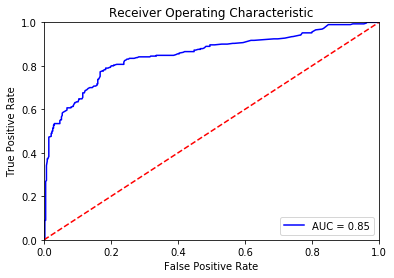

In [91]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()